In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Science Job Salaries

https://salaries.ai-jobs.net/

In [2]:
df = pd.read_csv('static/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Introduction

We want to figure out what data we have in our dataset. We can do this by using the `info()` method.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


For our numerical data we can quickly get some rough information about all the different columns by using the `describe()` method.

In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
print(df['company_location'].unique())

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']


We have some numerical data, but there is also some categorical data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


We can also plot this data as well. We can use a box and whisker plot to visualize this data.

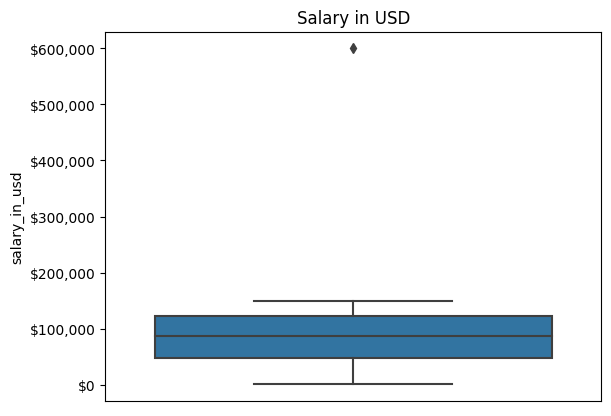

In [7]:
tmp = df.describe()
plot = sns.boxplot(data=tmp, y='salary_in_usd')
plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Salary in USD')
plot.xaxis.set_visible(False)

We see we have one outlier way out at 600k, we can remove this and plot the data again to get a slightly nicer visualization of that salary data.

[Text(0, 0.5, 'salary_in_usd')]

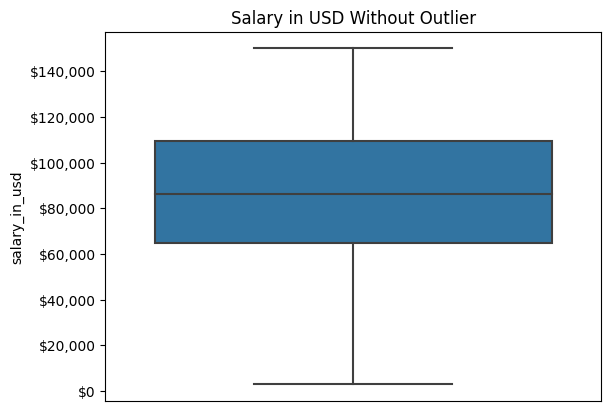

In [8]:
tmp = df.describe()
tmp.drop('count', axis=0, inplace=True)
tmp.drop('max', axis=0, inplace=True)
plot = sns.boxplot(data=tmp['salary_in_usd'])
plot.xaxis.set_visible(False)
plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Salary in USD Without Outlier')
plot.set(ylabel='salary_in_usd')

# Visualization

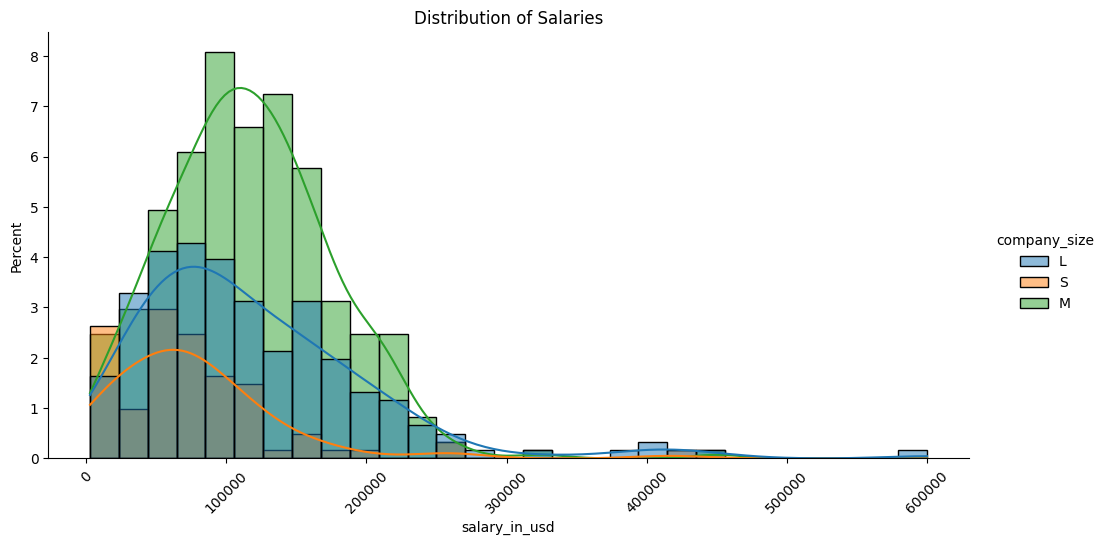

In [9]:
tmp = df
# distribution plot
plot = sns.displot(data=tmp, x='salary_in_usd', kind='hist', stat='percent', hue='company_size', height=5, aspect=2, kde=True)
plt.xticks(rotation=45)
plt.title('Distribution of Salaries')
plt.show()

# How much does the annual average salary increase with each experience level?

We have data that was collected year by year, so we can first group the data by year, and try to see if there was any trend over time.

[Text(0, 0.5, 'salary_in_usd')]

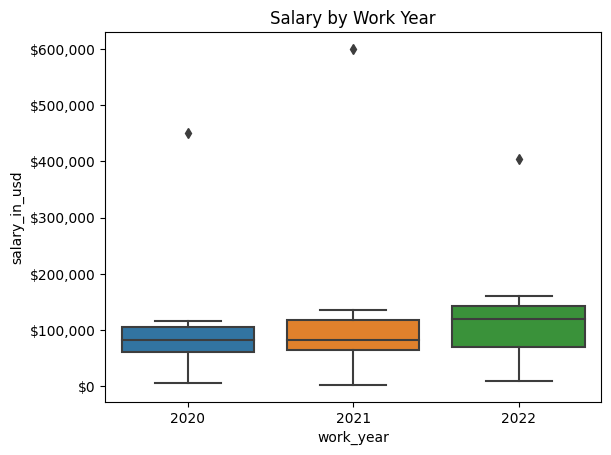

In [10]:
tmp = df[['salary_in_usd', 'work_year']]
tmp = tmp.groupby('work_year').describe()
tmp = tmp['salary_in_usd']
tmp.drop('count', axis=1, inplace=True)
tmp = tmp.transpose()
plot = sns.boxplot(data=tmp)
plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Salary by Work Year')
plot.set(ylabel='salary_in_usd')

Our graphs are heavily skewed by the max outliers, so let's remove those and plot again.

[Text(0, 0.5, 'salary_in_usd')]

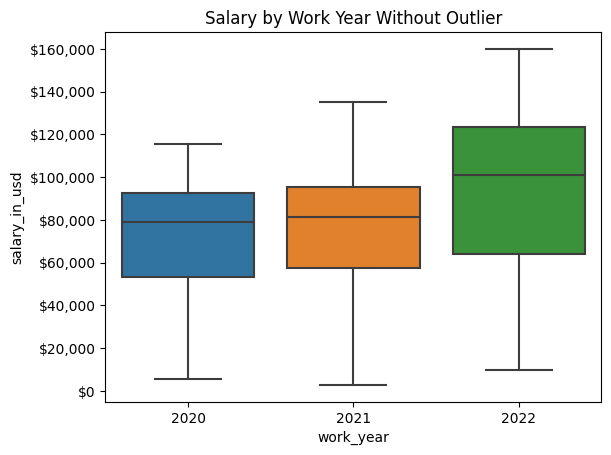

In [11]:
tmp = df[['salary_in_usd', 'work_year']]
tmp = tmp.groupby('work_year').describe()
tmp = tmp['salary_in_usd'] # this line is necessary because it created a multi-index in the last step
tmp.drop('count', axis=1, inplace=True)
tmp.drop('max', axis=1, inplace=True)
tmp = tmp.transpose()
plot = sns.boxplot(data=tmp)
plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Salary by Work Year Without Outlier')
plot.set(ylabel='salary_in_usd')

Text(0.5, 1.0, 'Average Salary by Work Year Without Outlier')

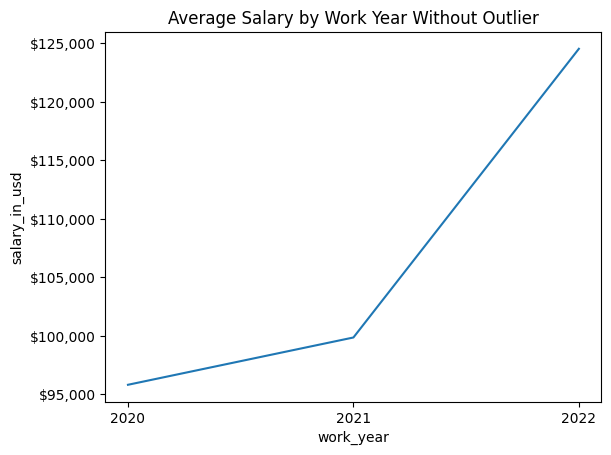

In [12]:
tmp = df[['salary_in_usd', 'work_year']]
tmp = tmp.groupby('work_year').mean().reset_index()
tmp['work_year'] = tmp['work_year'].astype(str)
plot = sns.lineplot(data=tmp, x='work_year', y='salary_in_usd')
plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Average Salary by Work Year Without Outlier')

# Is there a correlation between company size and salary?

The below graph illustrates the relationship between salary and company size. The bigger company tends to pay more salary when compared to the smaller company.

Text(0.5, 1.0, 'Percentage of Employees by Company Size')

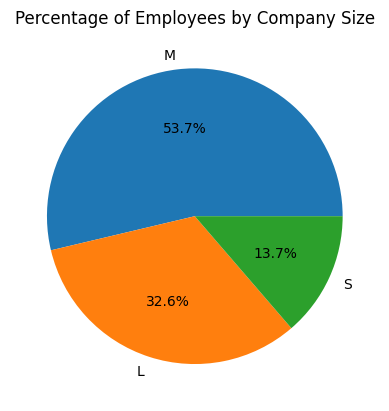

In [13]:
tmp = df['company_size']
tmp = tmp.value_counts()
tmp = tmp.to_frame()
tmp['percentage'] = tmp['company_size'] / tmp['company_size'].sum()
tmp.reset_index(inplace=True)
# create a seaborn pie chart
plt.pie(tmp['percentage'], labels=tmp['index'], autopct='%1.1f%%')
plt.title('Percentage of Employees by Company Size')
# show percentages in the legend

/var/folders/1q/dbl1686s2m95bg37g_s56qzc0000gn/T/ipykernel_52332/1630688707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['company_size'] = pd.Categorical(tmp['company_size'], categories=['S', 'M', 'L'], ordered=True)


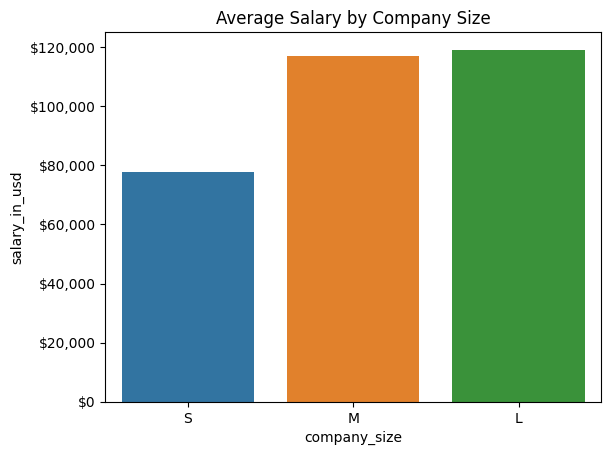

In [14]:
# average salary by company size
tmp = df[['company_size', 'salary_in_usd']]
tmp['company_size'] = pd.Categorical(tmp['company_size'], categories=['S', 'M', 'L'], ordered=True)
tmp = tmp.groupby('company_size')['salary_in_usd'].mean().reset_index()
plot = sns.barplot(data = tmp, x='company_size', y='salary_in_usd')
plot.title.set_text('Average Salary by Company Size')
plot.yaxis.set_major_formatter('${x:,.0f}')

/var/folders/1q/dbl1686s2m95bg37g_s56qzc0000gn/T/ipykernel_52332/1519198356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['company_size'] = pd.Categorical(tmp['company_size'], categories=['S', 'M', 'L'], ordered=True)


Text(0.5, 1.0, 'Salary by Company Size')

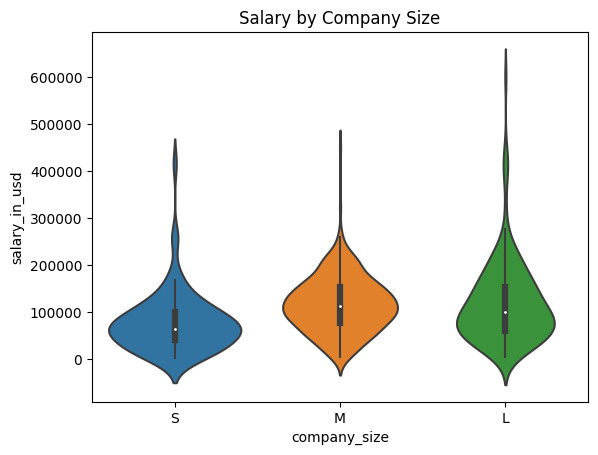

In [15]:
tmp = df[['company_size', 'salary_in_usd']]
# calculate the average salary each person gets compared to the overall average
# change order to S M L
tmp['company_size'] = pd.Categorical(tmp['company_size'], categories=['S', 'M', 'L'], ordered=True)
plot = sns.violinplot(data=tmp, x='company_size', y='salary_in_usd')
plot.set_title('Salary by Company Size')

# How does the number of remote employees compare to non-remote employees change over time?

The remote job trend seems to be decrease as the time pass. People tend to find the job in their home town, rather than doing remotely.

Text(0.5, 1.0, 'Number of Employees by Remote Type')

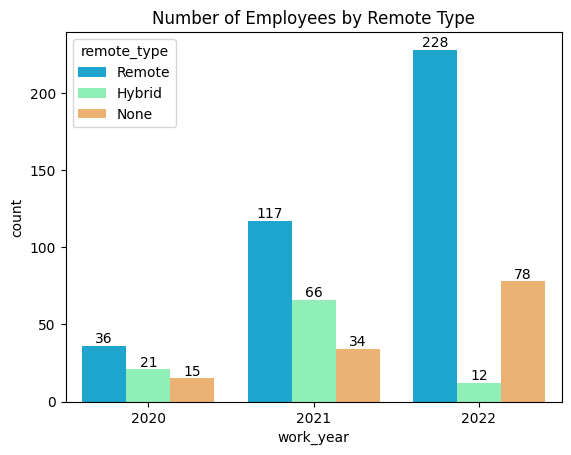

In [16]:
tmp = df[['work_year', 'remote_ratio']]
remote_type = pd.DataFrame({'remote_ratio': [0, 50, 100], 'remote_type': ['None', 'Hybrid', 'Remote']})

merged = pd.merge(tmp, remote_type, on='remote_ratio', how='left')
merged.drop('remote_ratio', axis=1, inplace=True)

tmp = merged.groupby('work_year')['remote_type'].value_counts().reset_index(name='count')
plot = sns.barplot(data=tmp, x='work_year', y='count', hue='remote_type', palette='rainbow')
for i in plot.containers:
    plot.bar_label(i, )
plot.set_title('Number of Employees by Remote Type')

/var/folders/1q/dbl1686s2m95bg37g_s56qzc0000gn/T/ipykernel_52332/3108552043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['work_in_another_country'] = tmp['employee_residence'] != tmp['company_location']


Text(0.5, 1.0, 'Number of Employees Who Work in Another Country')

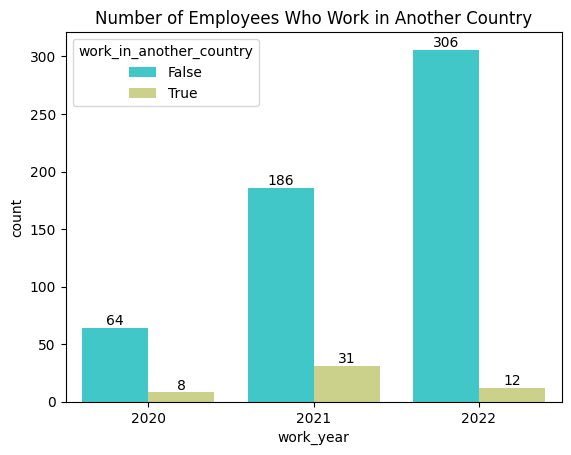

In [17]:
tmp = df[['work_year', 'employee_residence', 'company_location']]
tmp['work_in_another_country'] = tmp['employee_residence'] != tmp['company_location']

plot = sns.countplot(data=tmp, x='work_year', hue='work_in_another_country', palette='rainbow')
for i in plot.containers:
    plot.bar_label(i, )
plot.set_title('Number of Employees Who Work in Another Country')

Text(0.5, 1.0, 'Average Salary by Remote Type')

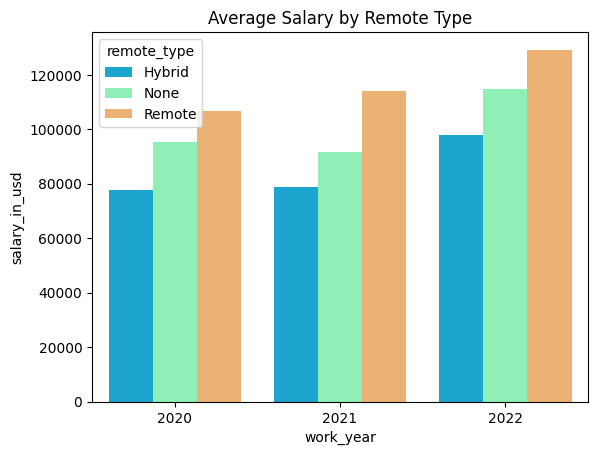

In [18]:
tmp = df[['work_year', 'remote_ratio', 'salary_in_usd']]
remote_type = pd.DataFrame({'remote_ratio': [0, 50, 100], 'remote_type': ['None', 'Hybrid', 'Remote']})

merged = pd.merge(tmp, remote_type, on='remote_ratio', how='left')
merged.drop('remote_ratio', axis=1, inplace=True)

# group by work year and remote type and get the average salary
tmp = merged.groupby(['work_year', 'remote_type'])['salary_in_usd'].mean().reset_index()
plot = sns.barplot(data=tmp, x='work_year', y='salary_in_usd', hue='remote_type', palette='rainbow')
plot.set_title('Average Salary by Remote Type')

# How much does the annual average salary increase with each experience level?

Unsurprisingly, executive-level/director receives the highest salary, followed by senior-level/expert, mid-level/intermediate, and entry-level/junior. Moreover, contract tends to pay the most in contrast to part-time that pays the least.

/var/folders/1q/dbl1686s2m95bg37g_s56qzc0000gn/T/ipykernel_52332/1346117090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['experience_level'] = pd.Categorical(tmp['experience_level'], categories=['EN', 'MI', 'SE', 'EX'], ordered=True)


Text(0.5, 1.0, 'Average Salary by Experience Level')

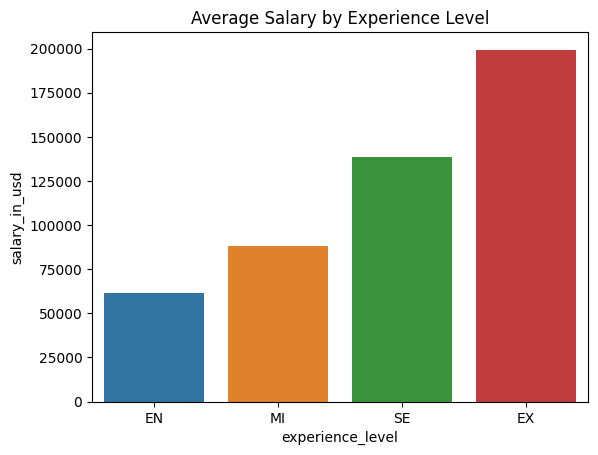

In [19]:
tmp = df[['salary_in_usd', 'experience_level']]
tmp['experience_level'] = pd.Categorical(tmp['experience_level'], categories=['EN', 'MI', 'SE', 'EX'], ordered=True)
tmp = tmp.groupby(['experience_level'])['salary_in_usd'].mean().reset_index()
plot = sns.barplot(data=tmp, x='experience_level', y='salary_in_usd')
plot.set_title('Average Salary by Experience Level')

/var/folders/1q/dbl1686s2m95bg37g_s56qzc0000gn/T/ipykernel_52332/3591331368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['experience_level'] = pd.Categorical(tmp['experience_level'], categories=['EN', 'MI', 'SE', 'EX'], ordered=True)


Text(0.5, 1.0, 'Average Salary by Experience Level and Employment Type')

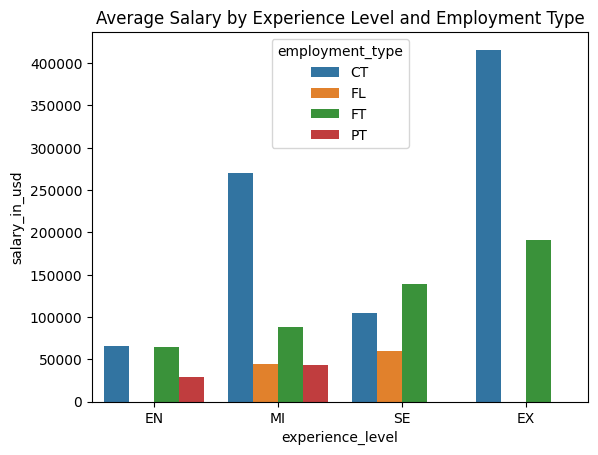

In [20]:
tmp = df[['employment_type', 'salary_in_usd', 'experience_level']]
tmp['experience_level'] = pd.Categorical(tmp['experience_level'], categories=['EN', 'MI', 'SE', 'EX'], ordered=True)
tmp = tmp.groupby(['employment_type', 'experience_level'])['salary_in_usd'].mean().reset_index()
plot = sns.barplot(data=tmp, x='experience_level', y='salary_in_usd', hue='employment_type')
plot.set_title('Average Salary by Experience Level and Employment Type')

The following barplot compares the salary of each job title. Data Analytic Lead seems to receive the highest salary in average while 3D Computer Vision Researcher appears to get the lowest among all the jobs in this dataset.

Text(0.5, 1.0, 'Salary by Job Title')

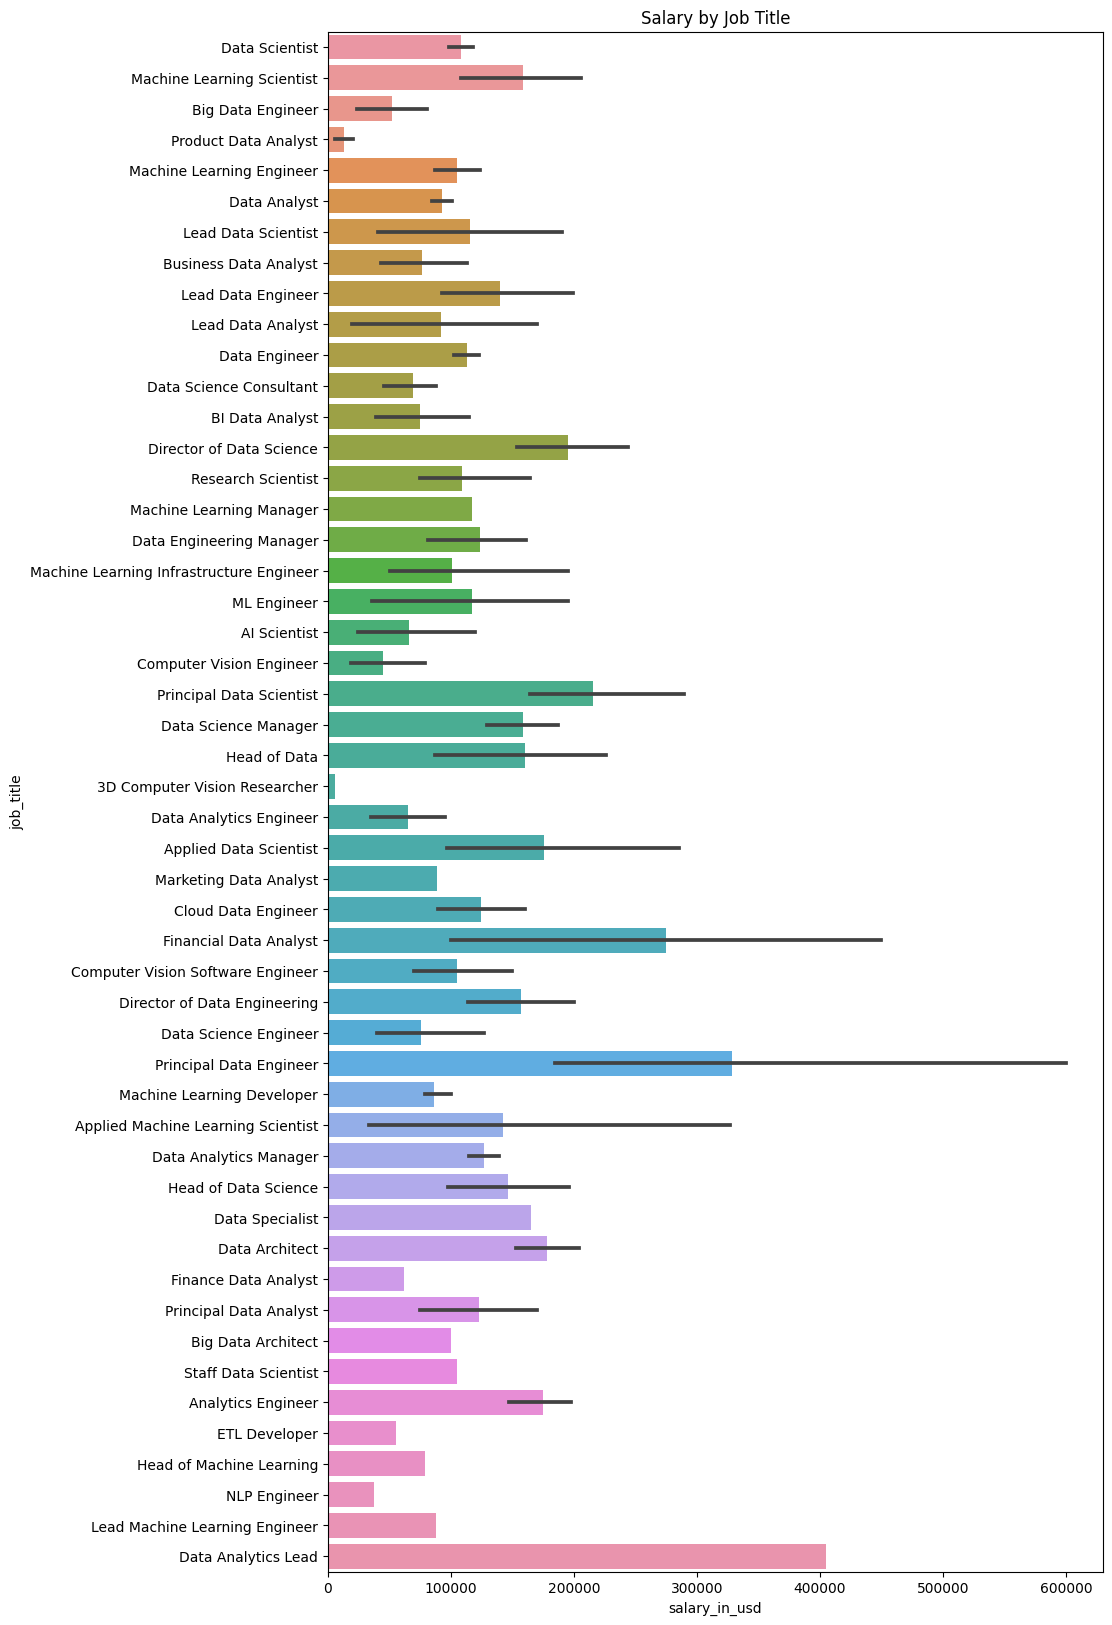

In [21]:
fig, ax = plt.subplots(figsize=(10, 20))
tmp = df[['salary_in_usd', 'job_title']]
plot = sns.barplot(data=tmp, x='salary_in_usd', y='job_title')
plot.set_title('Salary by Job Title')

Text(0.5, 1.0, 'Average Salary by Job Title')

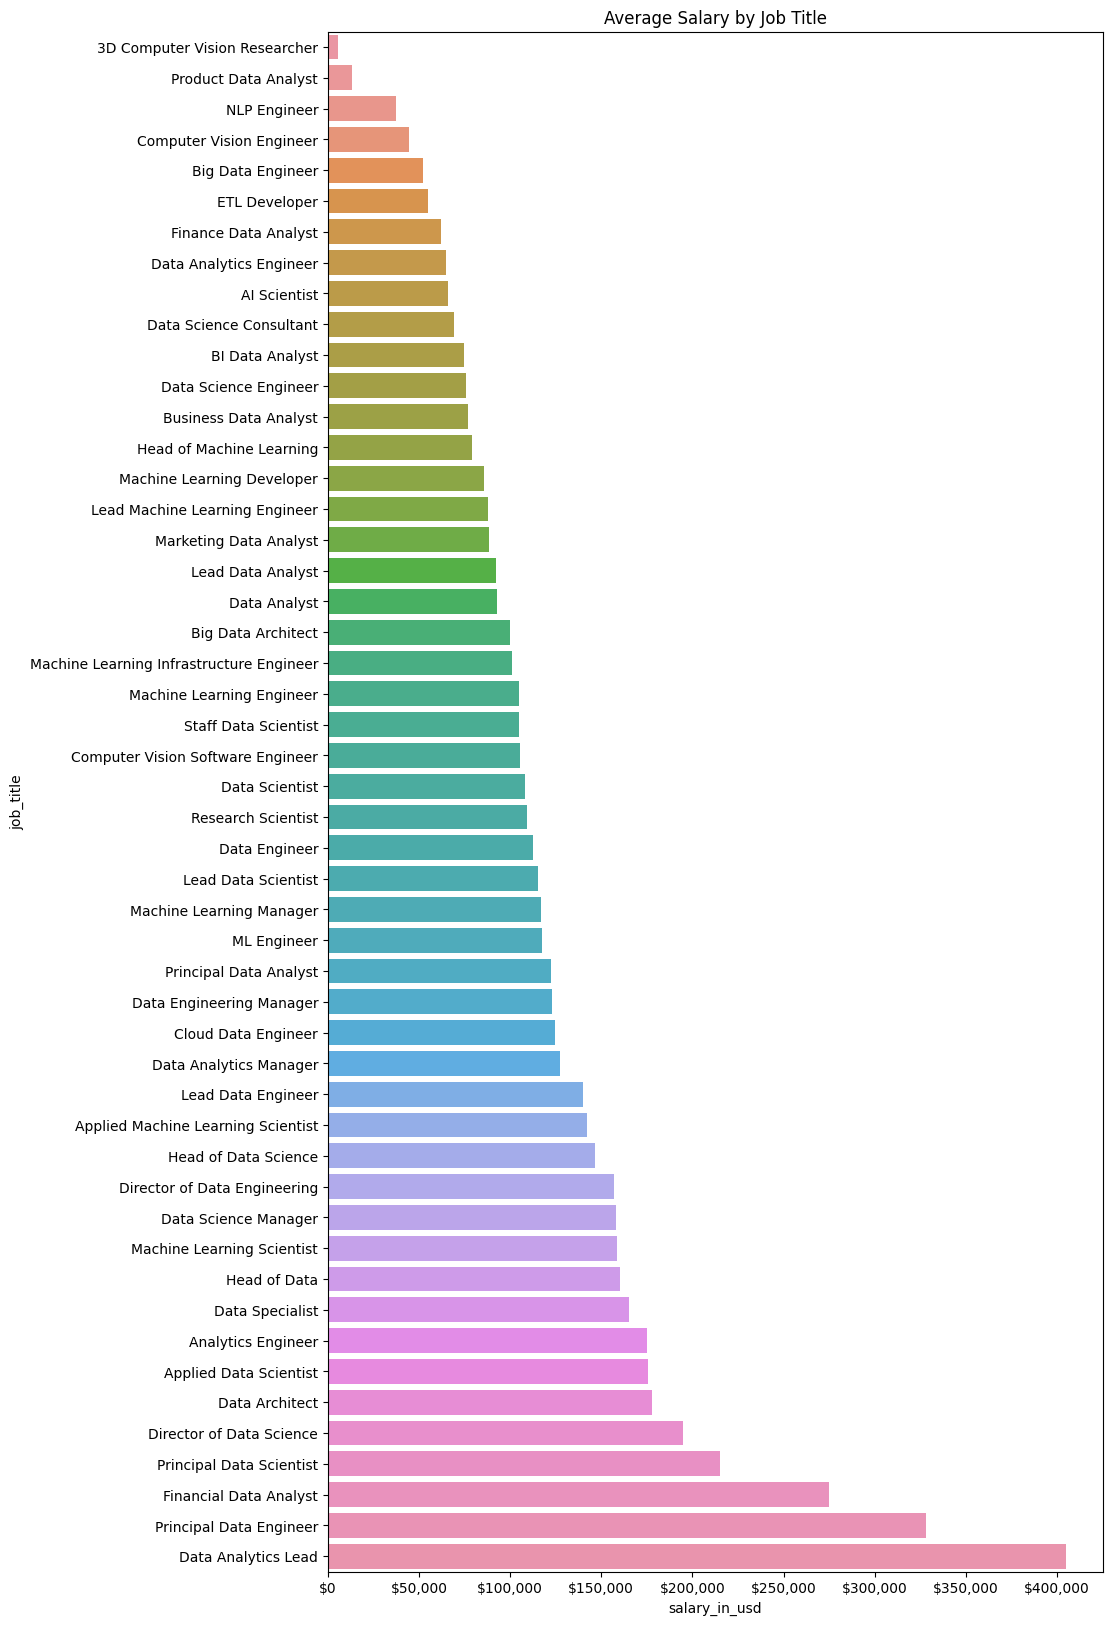

In [22]:
fig, ax = plt.subplots(figsize=(10, 20))
tmp = df[['salary_in_usd', 'job_title']]
tmp = tmp.groupby('job_title')['salary_in_usd'].mean().reset_index()
tmp = tmp.sort_values('salary_in_usd', ascending=True)
plot = sns.barplot(data=tmp, x='salary_in_usd', y='job_title')
plot.xaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Average Salary by Job Title')

In [23]:
# We think we can condense everything down to just 4 roles
# Data Scientist, Data Engineer, Data Analyst, Machine Learning
print(df['job_title'].unique())

['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data Anal

/var/folders/1q/dbl1686s2m95bg37g_s56qzc0000gn/T/ipykernel_52332/850872867.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['job_title'] = tmp['job_title'].apply(condense_job_title)


Text(0.5, 1.0, 'Average Salary by Categorized Job Title')

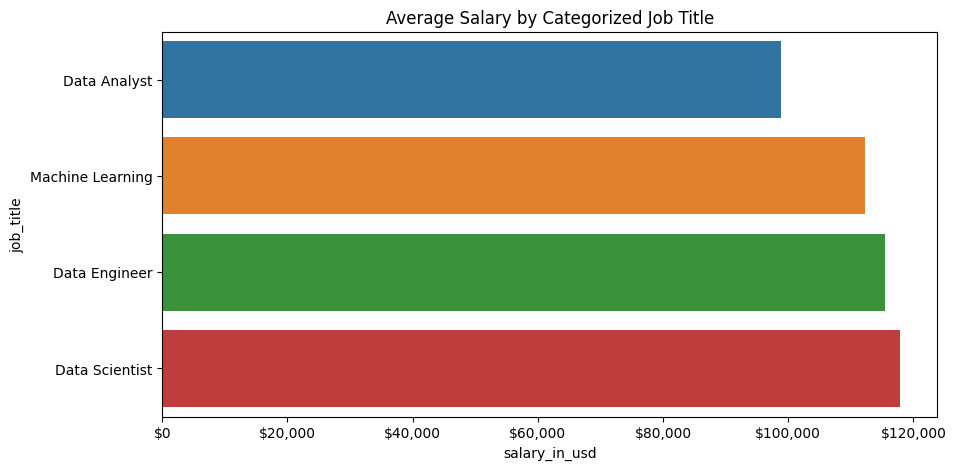

In [24]:
# We did this hand sorted but yeah
condensed = {
    'Data Scientist': [
        'Data Scientist', 'Research Scientist', 'Data Science Consultant', 'Applied Data Scientist', 'AI Scientist', '3D Computer Vision Researcher', 'Principal Data Scientist',
        'Staff Data Scientist', 'Data Specialist', 'Head of Data Science', 'Data Science Manager', 'Lead Data Scientist', 'Director of Data Science', 'Head of Data'
    ], 
    'Data Engineer': [
        'Data Engineer', 'Computer Vision Engineer', 'Computer Vision Software Engineer', 'Big Data Engineer', 'ETL Developer', 'Data Architect', 'Cloud Data Engineer',
        'Data Science Engineer', 'Principal Data Engineer', 'Big Data Architect', 'Data Engineering Manager', 'Lead Data Engineer', 'Lead Machine Learning Engineer',
        'Director of Data Engineering'
    ],
    'Data Analyst': [
        'Data Analyst', 'BI Data Analyst', 'Financial Data Analyst', 'Business Data Analyst', 'Data Analytics Engineer', 'Principal Data Analyst', 'Product Data Analyst',
        'Marketing Data Analyst', 'Analytics Engineer', 'Finance Data Analyst', 'Lead Data Analyst', 'Data Analytics Manager', 'Data Analytics Lead'
    ], 
    'Machine Learning': [
        'ML Engineer', 'Machine Learning Developer', 'Machine Learning Engineer', 'Applied Machine Learning Scientist', 'Machine Learning Scientist',
        'Machine Learning Infrastructure Engineer', 'NLP Engineer', 'Machine Learning Manager', 'Head of Machine Learning'
    ]
}

# use this condensed list to categorize the job titles into this more condensed list
def condense_job_title(job_title):
    for key, value in condensed.items():
        if job_title in value:
            return key
    return 'Other'

tmp = df[['job_title', 'salary_in_usd']]
tmp['job_title'] = tmp['job_title'].apply(condense_job_title)

fig, ax = plt.subplots(figsize=(10, 5))
tmp = tmp.groupby('job_title')['salary_in_usd'].mean().reset_index()
tmp = tmp.sort_values('salary_in_usd', ascending=True)
plot = sns.barplot(data=tmp, x='salary_in_usd', y='job_title')
plot.xaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Average Salary by Categorized Job Title')

# Which country pay the highest salary in average? Which is the lowest?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'VN'),
  Text(1, 0, 'IR'),
  Text(2, 0, 'KE'),
  Text(3, 0, 'PK'),
  Text(4, 0, 'UA'),
  Text(5, 0, 'MD'),
  Text(6, 0, 'AS'),
  Text(7, 0, 'BR'),
  Text(8, 0, 'HN'),
  Text(9, 0, 'TR'),
  Text(10, 0, 'CO'),
  Text(11, 0, 'MT'),
  Text(12, 0, 'IN'),
  Text(13, 0, 'NG'),
  Text(14, 0, 'MX'),
  Text(15, 0, 'EE'),
  Text(16, 0, 'HU'),
  Text(17, 0, 'IT'),
  Text(18, 0, 'MY'),
  Text(19, 0, 'CL'),
  Text(20, 0, 'LU'),
  Text(21, 0, 'HR'),
  Text(22, 0, 'PT'),
  Text(23, 0, 'CZ'),
  Text(24, 0, 'GR'),
  Text(25, 0, 'ES'),
  Text(26, 0, 'DK'),
  Text(27, 0, 'NL'),
  Text(28, 0, 'RO'),
  Text(29, 0, 'SI'),
  Text(30, 0, 'FR'),
  Text(31, 0, 'CH'),
  Text(32, 0, 'PL'),
  Text(33, 0, 'IE'),
  Text(34, 0, 'CN'),
  Text(35, 0, 'AT'),
  Text(36, 0, 'GB'),
  Text(

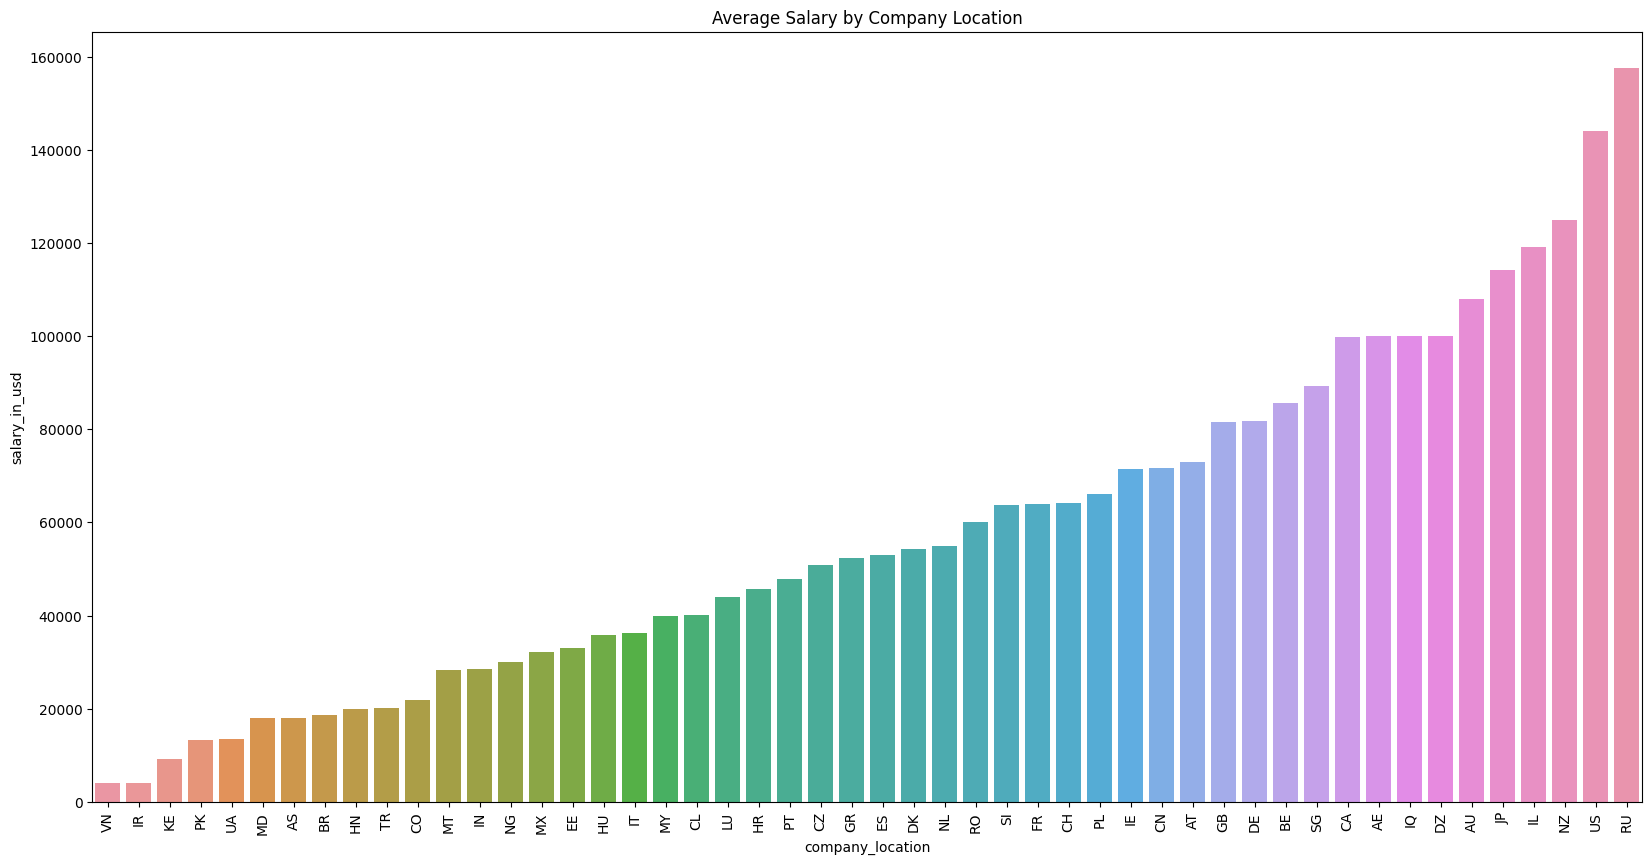

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
tmp = df[['salary_in_usd', 'company_location']]
tmp = tmp.groupby('company_location')['salary_in_usd'].mean().reset_index()
tmp = tmp.sort_values('salary_in_usd', ascending=True)
plot = sns.barplot(data=tmp, y='salary_in_usd', x='company_location')
plot.set_title('Average Salary by Company Location')
plt.xticks(rotation=90)

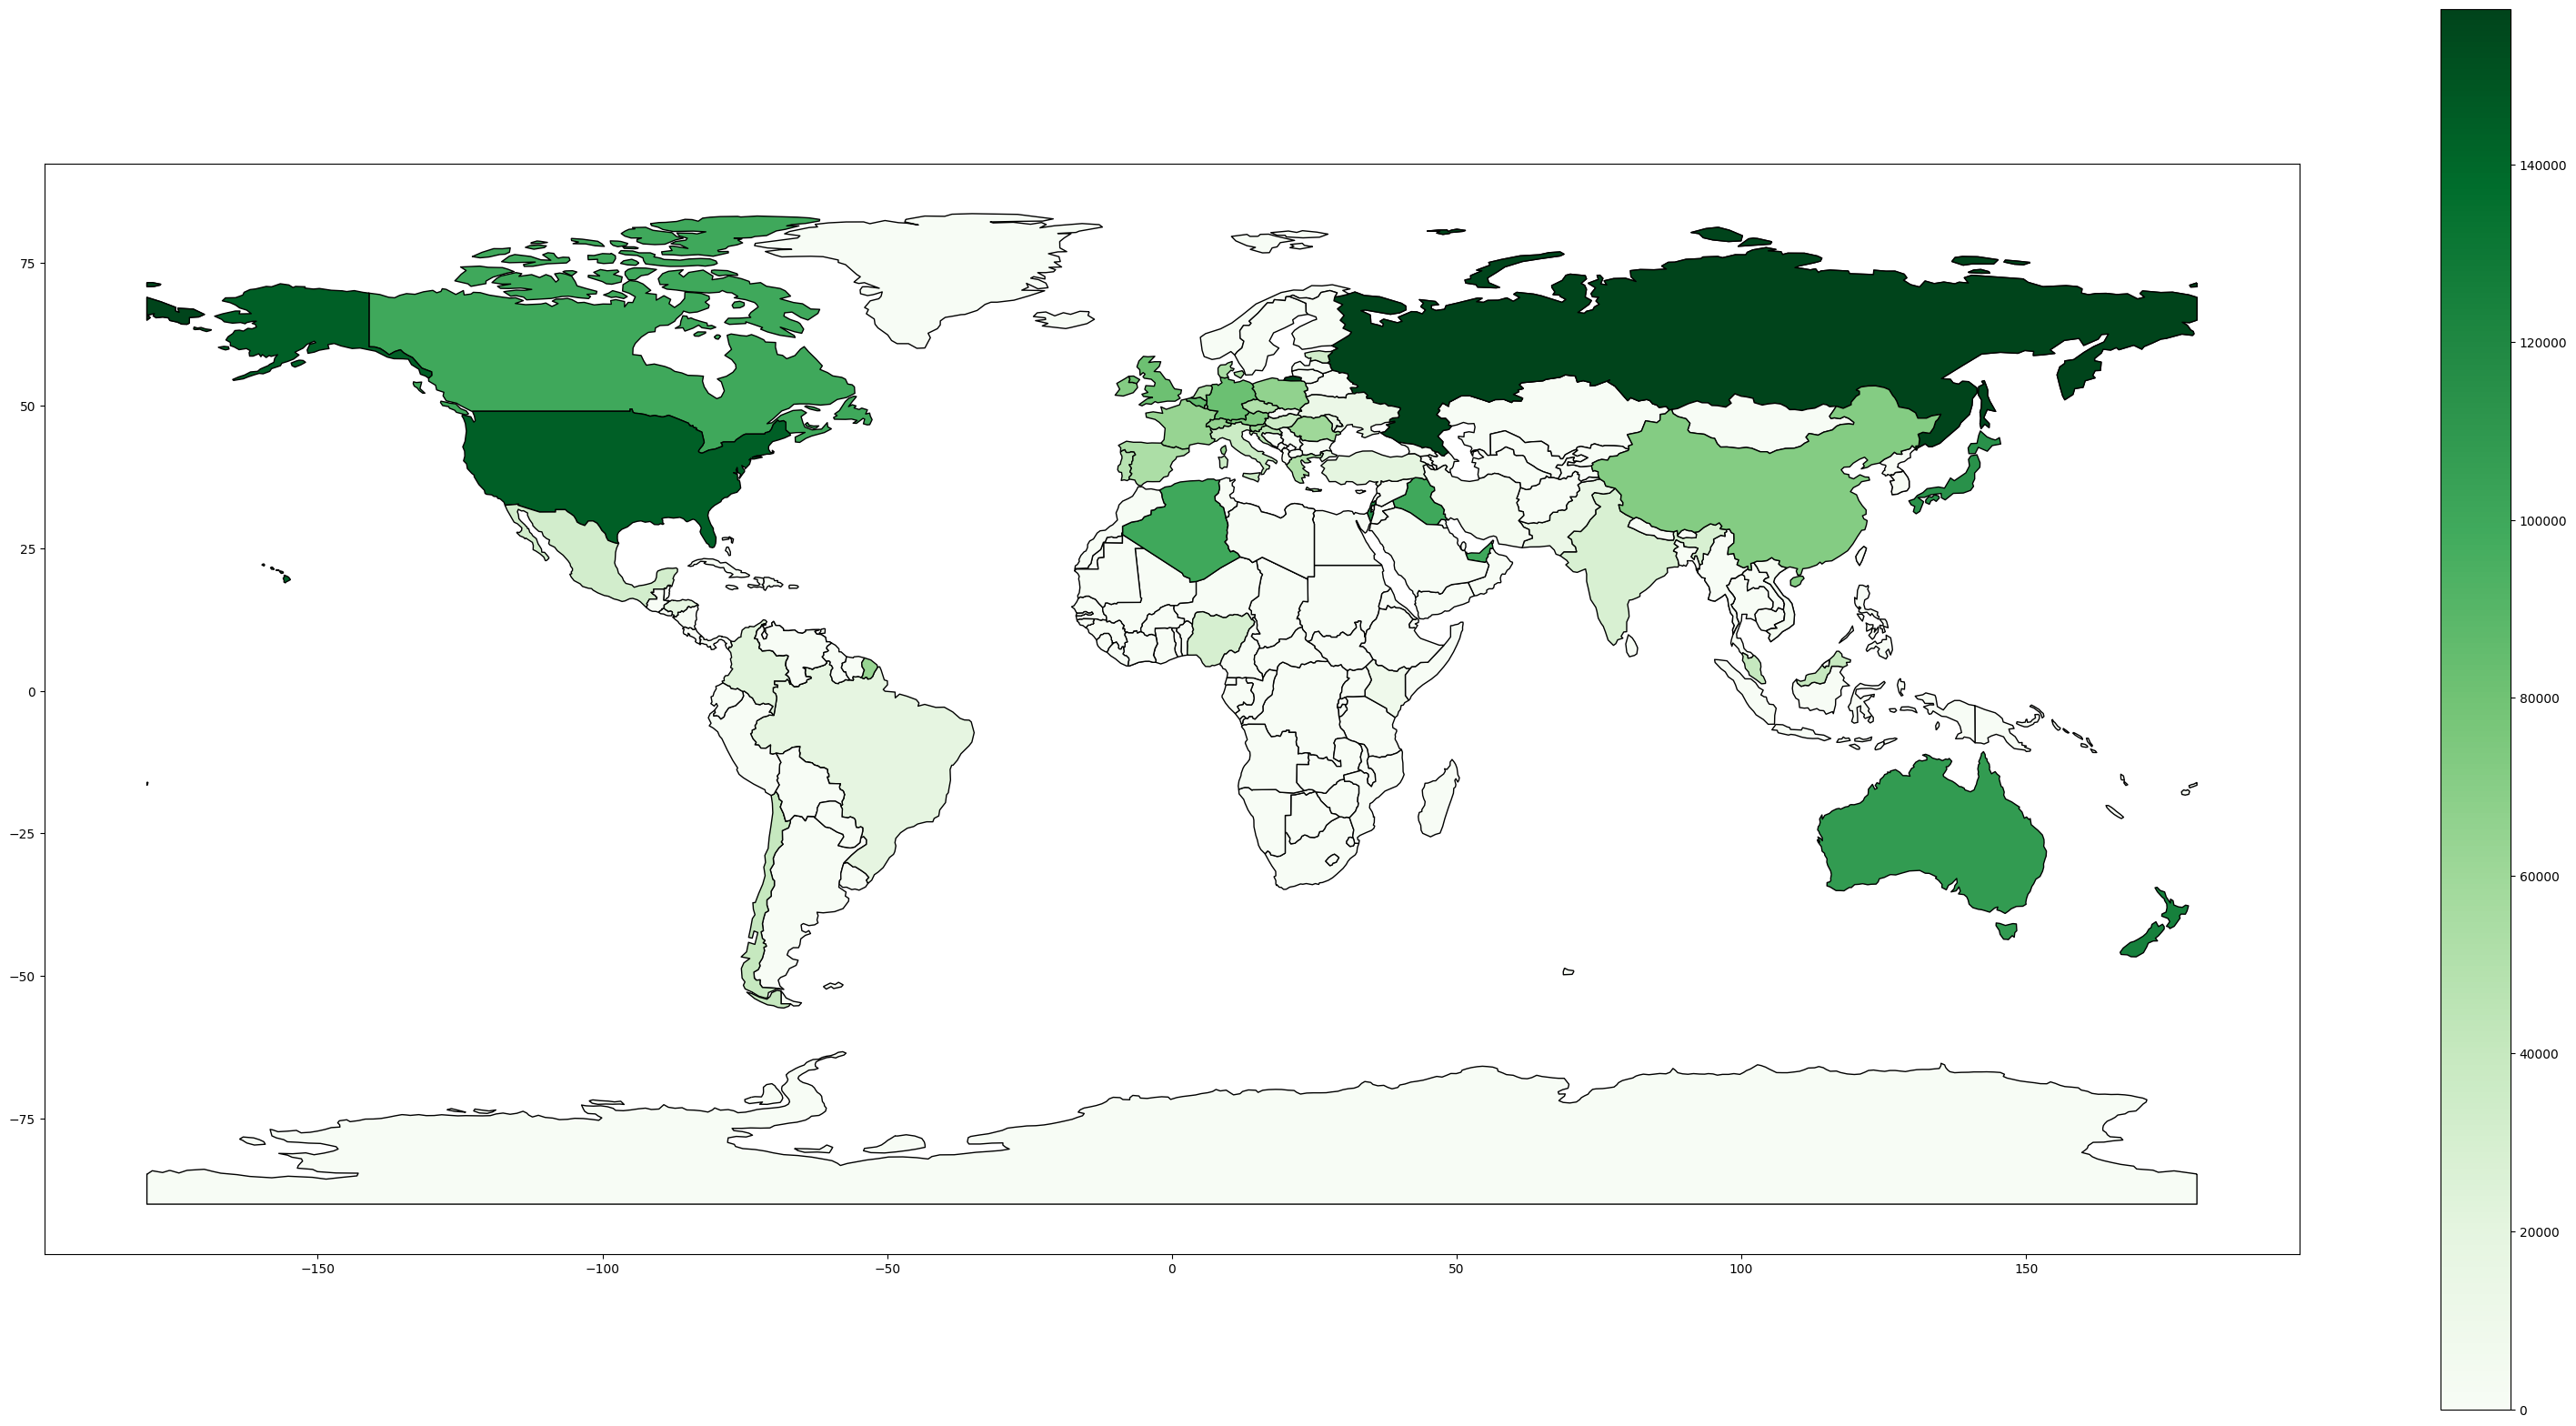

In [26]:
tmp = df[['salary_in_usd', 'company_location']]
tmp = tmp.groupby('company_location')['salary_in_usd'].mean().reset_index()

coorddf = pd.read_csv('static/country_coord.csv')
coorddf = coorddf[['Alpha-2-code', 'Alpha-3-code']]
# remove the '' from the Alpha-2-code column

# rename columns to something easier
coorddf.rename(columns={'Alpha-2-code': 'country_code', 'Alpha-3-code': 'iso_a3'}, inplace=True)

tmp['company_location'] = tmp['company_location'].astype(str)
coorddf['country_code'] = coorddf['country_code'].astype(str)

coorddf['country_code'] = coorddf['country_code'].str.replace('"', '')
coorddf['country_code'] = coorddf['country_code'].str.replace(' ', '')

coorddf['iso_a3'] = coorddf['iso_a3'].str.replace('"', '')
coorddf['iso_a3'] = coorddf['iso_a3'].str.replace(' ', '')

# map the 2-alpha country codes from coorddf to the company_location column in tmp
merged = pd.merge(tmp, coorddf, left_on='company_location', right_on='country_code', how='right')
merged.drop(columns=['country_code'], inplace=True)

# replace NaN values with 0
merged['salary_in_usd'].fillna(0, inplace=True)

# create a map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(merged, on='iso_a3')
plot = merged.plot(column='salary_in_usd', cmap='Greens', figsize=(40, 20), legend=True, edgecolor='black', linewidth=1)

# plot the locations with unknown country as separate markers
plt.show()